In [4]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data from csv
health_data = pd.read_csv("Hospital_Patients_Data.csv")

# Displaying first few rows
print(health_data.head())

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     19-12-2022     16-01-2023        Recovered            NaN    05-06-1973  
1     29-03-2023     21-04-2023        Recovered            NaN    21-11-1998  
2     16-09-2022     15-10-2022        Recovered            NaN    14-02-1942  
3     07-02-2022     11-02-2022        Recovered            NaN    17-01-1943  
4     25-10-2022     30-10-2022        Recovered            NaN    28-07-1979  


In [5]:
# What is the total number of patients?
total_records = health_data.shape[0]

print("Total patients", total_records)

Total patients 8000


In [6]:
# How is the patients population distributed by gender?
gender_count = health_data['Gender'].value_counts()

print("Patients population distributed by gender")
print(gender_count)

Patients population distributed by gender
Gender
Male      5206
Female    2794
Name: count, dtype: int64


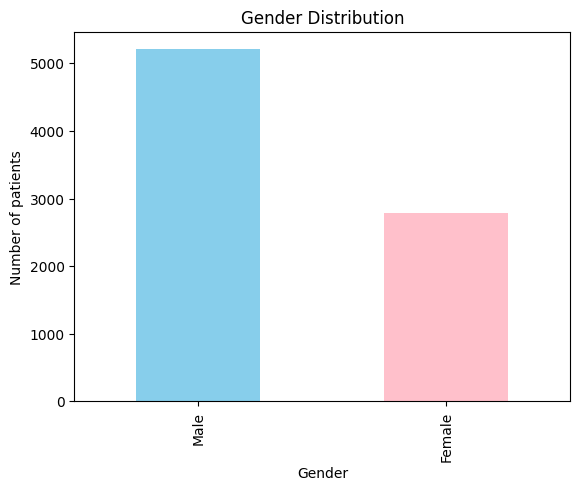

In [7]:
# Visualizing gender distribution
gender_count.plot(kind = 'bar', color = ["skyblue","pink"])
plt.title("Gender Distribution")
plt.ylabel("Number of patients")
plt.show()

<ipython-input-8-6294adf544eb>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])


Age Group
21-40     1645
41-60     1607
81-100    1599
61-80     1579
0-20      1533
Name: count, dtype: int64


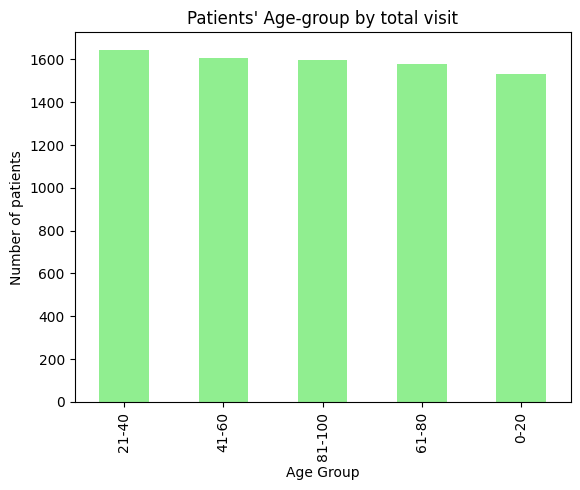

In [8]:
# Patients' Age-group by total visit

# Convert the Admission date and Date of Birth to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'], dayfirst = True)

# Convert the patients' age as of the time of Admission in years
health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days
health_data['Age'] = health_data['Age']/365

# Define age bins
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']

# Create an age group using the bins var defined
health_data['Age Group'] = pd.cut(health_data['Age'], bins = bins, labels = labels, right = False)

# Counting the number of patients in each age group
age_count = health_data['Age Group'].value_counts()

print(age_count)

# Visualizing the age groups
plot = age_count.plot(kind = 'bar', color = "lightgreen")
plt.title("Patients' Age-group by total visit")
plt.ylabel("Number of patients")
plt.show()

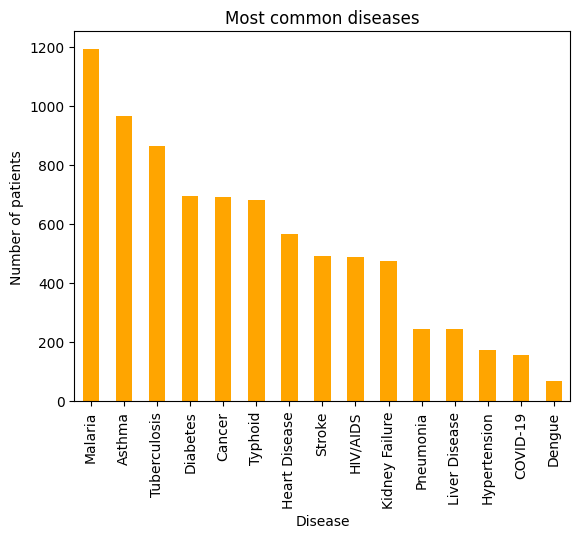

In [9]:
# Which diseases are most commonly diagnosed among the patients?
disease_count = health_data['Disease'].value_counts()

plot = disease_count.plot(kind = 'bar', color = "orange")
plt.title("Most common diseases")
plt.ylabel("Number of patients")
plt.show()

In [10]:
disease_count = health_data['Disease'].value_counts().nlargest(3) # Get the top 3 diseases
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [11]:
disease_count = health_data['Disease'].value_counts().nlargest(3) # Get the top 3 diseases
total_top3 = disease_count.sum()
print("Total count of the 3 most common diseases: ",total_top3)

Total count of the 3 most common diseases:  3023


In [12]:
# Calculate the top 3 diseases percentage
percentage = (disease_count/total_records)*100
print(round(percentage))

Disease
Malaria         15.0
Asthma          12.0
Tuberculosis    11.0
Name: count, dtype: float64


In [13]:
# Are certain diseases more prevalent in one gender compared to the other?
disease_gender = health_data.groupby(['Disease','Gender']).size().unstack()
print(disease_gender)


Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


In [14]:
# Calculate the duration of each patient stay and create a group to show numbers of patients in each group.

# Convering date in proper data type
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])

health_data['Stay Duration'] = health_data['Discharge Date'] - health_data['Admission Date']
health_data['Stay Duration'] = health_data['Stay Duration'].dt.days
print(health_data[['Admission Date', 'Discharge Date', 'Stay Duration']].head(10))

  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10-25     2022-10-30              5
5     2022-02-07     2022-02-15              8
6     2022-06-07     2022-06-30             23
7     2022-06-26     2022-06-27              1
8     2023-07-21     2023-08-07             17
9     2023-12-25     2024-01-05             11


<ipython-input-14-8f7788a6d69e>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])


In [15]:
# Group stay duration

bins = [-1,0,3,7,14,20, float('inf')]
labels = ['Same Day','1-3 Days','4-7 Days','8-14 Days','15-20 Days','Above 21 Days']

health_data['Stay Duration Group'] = pd.cut(health_data['Stay Duration'], bins = bins, labels = labels, right = True)
print(health_data['Stay Duration Group'])

0       Above 21 Days
1       Above 21 Days
2       Above 21 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 21 Days
7997        8-14 Days
7998    Above 21 Days
7999    Above 21 Days
Name: Stay Duration Group, Length: 8000, dtype: category
Categories (6, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < '15-20 Days' <
                         'Above 21 Days']


In [16]:
# Number of patients in each group

total_group_patient = health_data['Stay Duration Group'].value_counts()
print(total_group_patient)

Stay Duration Group
Above 21 Days    2682
8-14 Days        1837
15-20 Days       1587
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


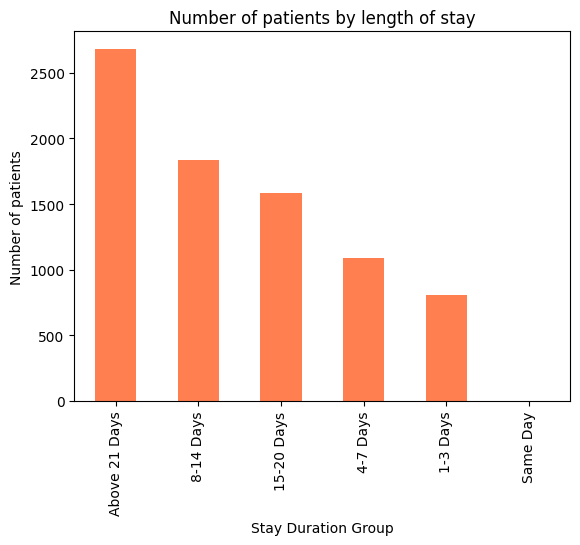

In [17]:
# Creating chart to visualize

total_group_patient.plot(kind = 'bar', color = "coral")
plt.title("Number of patients by length of stay")
plt.ylabel("Number of patients")
plt.show()

In [18]:
# For any records with a recorded course of death, analyze pattern to identify risk factor

# Filtering the records where the cause of death is not empty
death_cause = health_data.dropna(subset = 'Cause of Death')

count_cause = death_cause['Cause of Death'].value_counts()
print("Most common causes of death")
print(count_cause)

Most common causes of death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


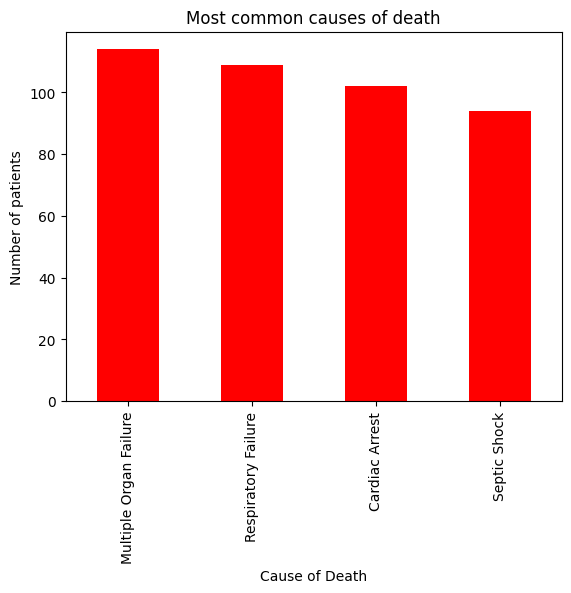

In [19]:
# Visualizing most common causes of death

count_cause.plot(kind = 'bar', color = "red")
plt.title("Most common causes of death")
plt.ylabel("Number of patients")
plt.show()

In [20]:
# What are the percentage of the following patients: deseased, under treatment and recovered?

# Total_patients
total_patients = health_data.shape[0]
print("Total patients: ",total_patients)

Total patients:  8000


In [21]:
# Total deaths
total_deaths = (health_data['Treatment Status'].str.lower() == "deceased").sum()
print("Total under treatment: ",total_deaths)

Total under treatment:  419


In [22]:
# Percentage of deceased
death_rate = (total_deaths/total_patients)*100
print("Percentage of deceased: ",round(death_rate,2))

Percentage of deceased:  5.24


In [23]:
# Recovered patients
total_recovered = (health_data['Treatment Status'].str.lower() == "recovered").sum()
print("Total recovered: ",total_recovered)

Total recovered:  6819


In [24]:
# Percentage of recovered
recovered_rate = (total_recovered/total_patients)*100
print("Percentage of recovered: ",round(recovered_rate,2))

Percentage of recovered:  85.24


In [25]:
# Under treatment patients
total_under_treatment = (health_data['Treatment Status'].str.lower() == "under treatment").sum()
print("Total under treatment: ",total_under_treatment)

Total under treatment:  762


In [26]:
# Percentage of under treatment patients
under_treatment_rate = (total_under_treatment/total_patients)*100
print("Percentage of under treatment: ",round(under_treatment_rate,2))

Percentage of under treatment:  9.52


In [27]:
# Showing this as a pie chart

print("Total recovery rate", recovered_rate)
print("Total under treatment rate", under_treatment_rate)
print("Total casualty rate", death_rate)

Total recovery rate 85.2375
Total under treatment rate 9.525
Total casualty rate 5.2375


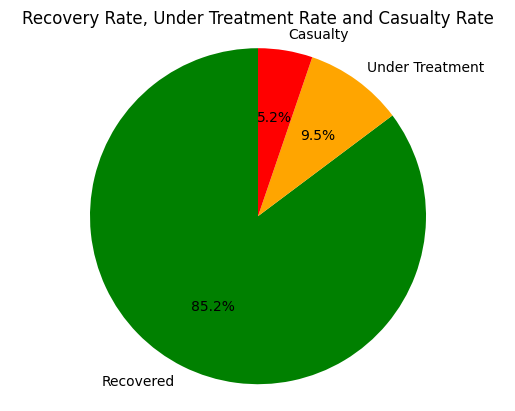

In [32]:
labels = ['Recovered', 'Under Treatment', 'Casualty']
sizes = [recovered_rate, under_treatment_rate, death_rate]
colors = ['green', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Recovery Rate, Under Treatment Rate and Casualty Rate')
plt.show()